### Importing Libraries for our code

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as mplt # we only need pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from pylab import plt
import math
# set the default Seaborn style for graphics
sb.set() 

### Importing the data

In [2]:
ufc_new = pd.read_csv("ufc_master_STABLE.csv")
ufc_new.head()


,R_fighter,B_fighter,R_odds,B_odds,R_ev,B_ev,date,location,country,Winner,...,finish_details,finish_round,finish_round_time,total_fight_time_secs,r_dec_odds,b_dec_odds,r_sub_odds,b_sub_odds,r_ko_odds,b_ko_odds
0,Curtis Blaydes,Chris Daukaus,-550.0,400,18.181818,400.000000,2022-03-26,"Columbus, Ohio, USA",USA,Red,...,Punch,2.0,0:17,317.0,260.0,1300.0,800.0,1500.0,-125.0,430.0
1,Joanne Wood,Alexa Grasso,230.0,-280,230.000000,35.714286,2022-03-26,"Columbus, Ohio, USA",USA,Blue,...,Rear Naked Choke,1.0,3:57,237.0,340.0,-140.0,1000.0,800.0,900.0,650.0
2,Matt Brown,Bryan Barberena,-105.0,-115,95.238095,86.956522,2022-03-26,"Columbus, Ohio, USA",USA,Blue,...,NaN,3.0,5:00,900.0,450.0,260.0,1200.0,800.0,160.0,300.0
3,Askar Askarov,Kai Kara-France,-440.0,340,22.727273,340.000000,2022-03-26,"Columbus, Ohio, USA",USA,Blue,...,NaN,3.0,5:00,900.0,-120.0,550.0,300.0,2200.0,700.0,550.0
4,Neil Magny,Max Griffin,-260.0,210,38.461538,210.000000,2022-03-26,"Columbus, Ohio, USA",USA,Red,...,NaN,3.0,5:00,900.0,-120.0,400.0,750.0,1400.0,500.0,500.0


### Distinguish datasets by relevant characteristics of the fighters

In [3]:
mycol = ['R_fighter',
 'B_fighter',
 'R_odds',
 'B_odds','Winner','weight_class',
 'B_avg_SIG_STR_pct',
 'B_avg_SUB_ATT',
 'B_avg_TD_pct',
 'B_Weight_lbs',
 'R_avg_SIG_STR_pct',
 'R_avg_SUB_ATT',
 'R_avg_TD_pct',
 'R_Weight_lbs','R_age',
 'B_age',
 'lose_streak_dif',
 'win_streak_dif',
 'longest_win_streak_dif',
 'win_dif',
 'loss_dif',
 'age_dif','better_rank','R_wins','R_draw','R_losses','B_wins','B_draw','B_losses',
]

### Information on Dataset Columns

>R_fighter (String) - Gives us the Red Fighter Name

>B_fighter (String) - Gives us the Blue Fighter Name

>R_odds  (Numerical Value) - Red Odds (Money line)


>B_odds (Numerical Value) - Blue Odds (Money line)

>Winner (Categorical Value) - Gives us the winner, either Red or Blue 

>Weight Class (Categorical Value) - Gives us the weight class of both fighters

>B_avg_SIG_STR_Pct (Numerical Value) - Gives us the blue Significant Striking Accuracy in percentage

>B_avg_SUB_ATT (Numerical Value) - Gives us the Blue Average Submissions Attempted per 15 Minutes

>B_avg_TD_pct (Numerical Value) - Gives us the Blue Takedown Accuracy in percentage

>B_Weight_lbs (Numerical Value) - Gives us the Blue weight in lbs

>B_age (Numerical Value) - Gives us the Blue age

>R_avg_SIG_STR_Pct (Numerical Value) - Gives us the Red Significant Striking Accuracy in percentage

>R_avg_SUB_ATT (Numerical Value) - Gives us the Red Average Submissions Attempted per 15 Minutes

>R_avg_TD_pct (Numerical Value) - Gives us the Red Takedown Accuracy in percentage

>R_Weight_lbs (Numerical Value) - Gives us the Red weight in lbs

>R_age (Numerical Value) - Gives us the Red age


>Lose_streak_dif (Numerical Value) - Gives us the difference in their current lose streak: Blue’s Win Streak - Red’s Win Streak

>Win_streak_dif (Numerical Value) - Gives us the difference in their current win streak: Blue’s Win Streak - Red’s Win Streak

>Longest_win_streak_dif ( Numerical Value ) - Gives us the difference in the duration of their longest win streak: Blue’s Longest Win Streak - Red’s Longest Win Streak

>Win_dif ( Numerical Value ) - Gives us the difference in the number of wins throughout the fighters’ careers: Blue’s Wins- Red’s Wins

>Loss_dif ( Numerical Value ) - Gives us the difference in the number of losses : Blue’s Losses- Red’s Losses

>Height_dif ( Numerical Value ) - Gives us the difference in the height: Blue’s height- Red’s height

>Reach_dif ( Numerical Value ) - Gives us the difference in the reach: Blue’s reach - Red’s reach

>Age_dif ( Numerical Value ) - Gives us the difference in the age: Blue’s age - Red’s age

>Better rank (Categorical Value) - Gives us an indication of which fighter has a better ranking


### We check our dataset first to find out the possible outcomes for the winner column.

In [4]:
cleandataset = pd.DataFrame(ufc_new[mycol])
print((cleandataset["Winner"].unique()))

['Red' 'Blue']


### Cleaning the Dataset
We will be working on middleweight dataset set . We also clean our dataset by removing all NaN rows.



In [5]:
middleweightdata = cleandataset[cleandataset["weight_class"]=="Middleweight"]

In [6]:
middleweightdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 620 entries, 8 to 5132
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   R_fighter               620 non-null    object 
 1   B_fighter               620 non-null    object 
 2   R_odds                  620 non-null    float64
 3   B_odds                  620 non-null    int64  
 4   Winner                  620 non-null    object 
 5   weight_class            620 non-null    object 
 6   B_avg_SIG_STR_pct       532 non-null    float64
 7   B_avg_SUB_ATT           527 non-null    float64
 8   B_avg_TD_pct            527 non-null    float64
 9   B_Weight_lbs            620 non-null    int64  
 10  R_avg_SIG_STR_pct       579 non-null    float64
 11  R_avg_SUB_ATT           579 non-null    float64
 12  R_avg_TD_pct            579 non-null    float64
 13  R_Weight_lbs            620 non-null    int64  
 14  R_age                   620 non-null    i

In [7]:
for x in mycol:
    middleweightdata = middleweightdata[middleweightdata[x].isnull()==False]

middleweightdata.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 516 entries, 8 to 5132
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   R_fighter               516 non-null    object 
 1   B_fighter               516 non-null    object 
 2   R_odds                  516 non-null    float64
 3   B_odds                  516 non-null    int64  
 4   Winner                  516 non-null    object 
 5   weight_class            516 non-null    object 
 6   B_avg_SIG_STR_pct       516 non-null    float64
 7   B_avg_SUB_ATT           516 non-null    float64
 8   B_avg_TD_pct            516 non-null    float64
 9   B_Weight_lbs            516 non-null    int64  
 10  R_avg_SIG_STR_pct       516 non-null    float64
 11  R_avg_SUB_ATT           516 non-null    float64
 12  R_avg_TD_pct            516 non-null    float64
 13  R_Weight_lbs            516 non-null    int64  
 14  R_age                   516 non-null    i

### Creating New Function
Since better rank is a categorical variable, to able to use it in our binary classification and logistic regression model, we had to encode values to it so 0 will be used to represent “neither”, 1 will be used to represent “blue” and -1 will be used to represent “red”.

In [8]:
def myfunc(myStr):
    if myStr=="neither":
        return 0
    elif myStr=="Red":
        return -1
    else:
        return 1
    

middleweightdata['better_rank'] = middleweightdata['better_rank'].apply(myfunc)

### Creating new predictor variables
The current columns available to us are specific to each side (e.g red,blue) but for our prediction of outcome, it will be more useful to have variables that reflected the differences between the fighters so we created additional columns for the comparisons using the columns provided to us by the dataset.


In [9]:
#creating pct dif n weight dif  'B_avg_SUB_ATT','B_avg_TD_pct'
middleweightdata["weight_dif"] = middleweightdata['B_Weight_lbs']-middleweightdata['R_Weight_lbs']
middleweightdata["avg_SIG_STR_dif"] = middleweightdata['B_avg_SIG_STR_pct']-middleweightdata['R_avg_SIG_STR_pct']
middleweightdata["avg_TD_dif"] = middleweightdata['B_avg_TD_pct']-middleweightdata['R_avg_TD_pct']
middleweightdata["avg_SUB_ATT_dif"] = middleweightdata['B_avg_SUB_ATT']-middleweightdata['R_avg_SUB_ATT']
middleweightdata["R_win_pct"] = middleweightdata["R_wins"]*100/(middleweightdata["R_wins"]+middleweightdata["R_draw"]+middleweightdata["R_losses"])
middleweightdata["B_win_pct"] = middleweightdata["B_wins"]*100/(middleweightdata["B_wins"]+middleweightdata["B_draw"]+middleweightdata["B_losses"])
middleweightdata["win_pct_dif"] = middleweightdata["B_win_pct"]-middleweightdata["R_win_pct"]
middleweightdata.head(20)

,R_fighter,B_fighter,R_odds,B_odds,Winner,weight_class,B_avg_SIG_STR_pct,B_avg_SUB_ATT,B_avg_TD_pct,B_Weight_lbs,...,B_wins,B_draw,B_losses,weight_dif,avg_SIG_STR_dif,avg_TD_dif,avg_SUB_ATT_dif,R_win_pct,B_win_pct,win_pct_dif
8,Aliaskhab Khizriev,Denis Tiuliulin,-900.0,600,Red,Middleweight,0.37,0.0,0.00,185,...,0,0,0,0,-0.27,-0.60,-3.9,100.000000,NaN,NaN
29,Alex Pereira,Bruno Silva,-220.0,180,Red,Middleweight,0.51,0.0,0.18,185,...,3,0,0,0,-0.09,0.18,0.0,100.000000,100.000000,0.000000
35,Dalcha Lungiambula,Cody Brundage,-150.0,125,Blue,Middleweight,0.60,1.4,0.25,185,...,0,0,2,0,0.16,-0.25,1.4,50.000000,0.000000,-50.000000
52,Misha Cirkunov,Wellington Turman,-160.0,135,Blue,Middleweight,0.49,1.0,0.20,185,...,2,0,3,0,-0.02,-0.23,-0.8,54.545455,40.000000,-14.545455
55,Armen Petrosyan,Gregory Rodrigues,130.0,-155,Red,Middleweight,0.53,0.7,0.53,185,...,2,0,1,0,-0.02,0.53,0.7,100.000000,66.666667,-33.333333
66,Joaquin Buckley,Abdul Razak Alhassan,-165.0,140,Red,Middleweight,0.48,0.0,0.45,185,...,5,0,4,0,0.12,0.10,0.0,60.000000,55.555556,-4.444444
74,Israel Adesanya,Robert Whittaker,-300.0,240,Red,Middleweight,0.42,0.0,0.35,185,...,14,0,3,0,-0.07,0.35,-0.2,90.909091,82.352941,-8.556150
76,Jared Cannonier,Derek Brunson,-155.0,130,Red,Middleweight,0.47,0.6,0.33,185,...,17,0,6,0,-0.03,-0.17,0.6,58.333333,73.913043,15.579710
84,AJ Dobson,Jacob Malkoun,-110.0,-110,Blue,Middleweight,0.57,1.0,0.35,185,...,1,0,1,0,0.00,-0.15,0.2,100.000000,50.000000,-50.000000
88,Jack Hermansson,Sean Strickland,175.0,-210,Blue,Middleweight,0.40,0.3,0.61,185,...,11,0,3,0,-0.04,0.31,-0.2,69.230769,78.571429,9.340659


In [10]:
middleweightdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 516 entries, 8 to 5132
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   R_fighter               516 non-null    object 
 1   B_fighter               516 non-null    object 
 2   R_odds                  516 non-null    float64
 3   B_odds                  516 non-null    int64  
 4   Winner                  516 non-null    object 
 5   weight_class            516 non-null    object 
 6   B_avg_SIG_STR_pct       516 non-null    float64
 7   B_avg_SUB_ATT           516 non-null    float64
 8   B_avg_TD_pct            516 non-null    float64
 9   B_Weight_lbs            516 non-null    int64  
 10  R_avg_SIG_STR_pct       516 non-null    float64
 11  R_avg_SUB_ATT           516 non-null    float64
 12  R_avg_TD_pct            516 non-null    float64
 13  R_Weight_lbs            516 non-null    int64  
 14  R_age                   516 non-null    i

### Further Cleaning of Dataset

We experienced zero division error when computing the win percentages for debuting fighters with a clean record, so we had to do .fillna() to resolve this problem.

In [11]:
middleweightdata["B_win_pct"].fillna(value = 0, inplace = True)
middleweightdata["R_win_pct"].fillna(value = 0, inplace = True)
middleweightdata["win_pct_dif"].fillna(value = 0, inplace = True)

In [12]:
middleweightdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 516 entries, 8 to 5132
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   R_fighter               516 non-null    object 
 1   B_fighter               516 non-null    object 
 2   R_odds                  516 non-null    float64
 3   B_odds                  516 non-null    int64  
 4   Winner                  516 non-null    object 
 5   weight_class            516 non-null    object 
 6   B_avg_SIG_STR_pct       516 non-null    float64
 7   B_avg_SUB_ATT           516 non-null    float64
 8   B_avg_TD_pct            516 non-null    float64
 9   B_Weight_lbs            516 non-null    int64  
 10  R_avg_SIG_STR_pct       516 non-null    float64
 11  R_avg_SUB_ATT           516 non-null    float64
 12  R_avg_TD_pct            516 non-null    float64
 13  R_Weight_lbs            516 non-null    int64  
 14  R_age                   516 non-null    i

### Generating Train - Test Split

We then chose the variables that we believed play the most part in predicting the outcome of the match and we split our dataset into test and train set. We split our dataset into 75% train data and 25% test data,as well as fixing the randomness of the split to ensure consistency in the results obtained.
 

In [13]:
# Extract Response and Predictors
y = middleweightdata["Winner"]
X = middleweightdata[['lose_streak_dif',
 'win_streak_dif',
 'longest_win_streak_dif',
 'win_dif',
 'loss_dif',
 'age_dif','better_rank','R_odds',
 'B_odds',"weight_dif","avg_SIG_STR_dif","avg_TD_dif","avg_SUB_ATT_dif"]]

    
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state = 2)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (387,) (387, 13)
Test Set  : (129,) (129, 13)


In [14]:
X_test

,lose_streak_dif,win_streak_dif,longest_win_streak_dif,win_dif,loss_dif,age_dif,better_rank,R_odds,B_odds,weight_dif,avg_SIG_STR_dif,avg_TD_dif,avg_SUB_ATT_dif
693,1,-1,-2,-4,1,1,0,-375.0,277,15,-0.070000,-0.570000,-0.500000
2180,0,1,0,-2,2,7,-1,155.0,-175,0,0.008968,-0.044841,-0.944444
4627,0,-1,-2,-4,-1,2,0,-500.0,435,15,0.023750,-0.065000,-0.500000
1361,0,0,2,2,-4,0,0,-170.0,150,0,0.024286,0.241429,0.000000
630,3,-5,3,10,6,13,0,-135.0,115,0,-0.110000,-0.030000,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2093,-1,-2,0,0,0,2,0,150.0,-170,0,-0.100000,-0.153333,0.000000
3953,1,1,-1,-2,1,9,0,-190.0,165,0,-0.031000,0.115000,2.300000
2757,0,0,-2,-4,2,4,0,-115.0,-105,20,0.016250,-0.072500,-0.125000
5023,0,-8,-8,-7,-3,2,0,-460.0,410,20,-0.294805,0.329610,-0.272727


In [15]:
y_train.value_counts()

Red     213
Blue    174
Name: Winner, dtype: int64

# Training Our Machine Learning Model

### Binary Classification Model

We used binary classification to help us get a predicted outcome since our outcome is a categorical value. Binary classification is capable of returning probability and predicted outcome which we used in our Kelly Criterion computations.

In [16]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

DecisionTreeClassifier(max_depth=3)

[Text(1674.0, 951.3000000000001, 'B_odds <= 162.0\ngini = 0.495\nsamples = 387\nvalue = [174, 213]\nclass = Red'),
 Text(837.0, 679.5, 'avg_TD_dif <= -0.011\ngini = 0.491\nsamples = 236\nvalue = [134, 102]\nclass = Blue'),
 Text(418.5, 407.70000000000005, 'R_odds <= 200.0\ngini = 0.44\nsamples = 107\nvalue = [72, 35]\nclass = Blue'),
 Text(209.25, 135.89999999999998, 'gini = 0.461\nsamples = 97\nvalue = [62, 35]\nclass = Blue'),
 Text(627.75, 135.89999999999998, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]\nclass = Blue'),
 Text(1255.5, 407.70000000000005, 'R_odds <= 141.0\ngini = 0.499\nsamples = 129\nvalue = [62, 67]\nclass = Red'),
 Text(1046.25, 135.89999999999998, 'gini = 0.474\nsamples = 88\nvalue = [34, 54]\nclass = Red'),
 Text(1464.75, 135.89999999999998, 'gini = 0.433\nsamples = 41\nvalue = [28, 13]\nclass = Blue'),
 Text(2511.0, 679.5, 'avg_SIG_STR_dif <= 0.012\ngini = 0.389\nsamples = 151\nvalue = [40, 111]\nclass = Red'),
 Text(2092.5, 407.70000000000005, 'avg_SUB_ATT_dif <=

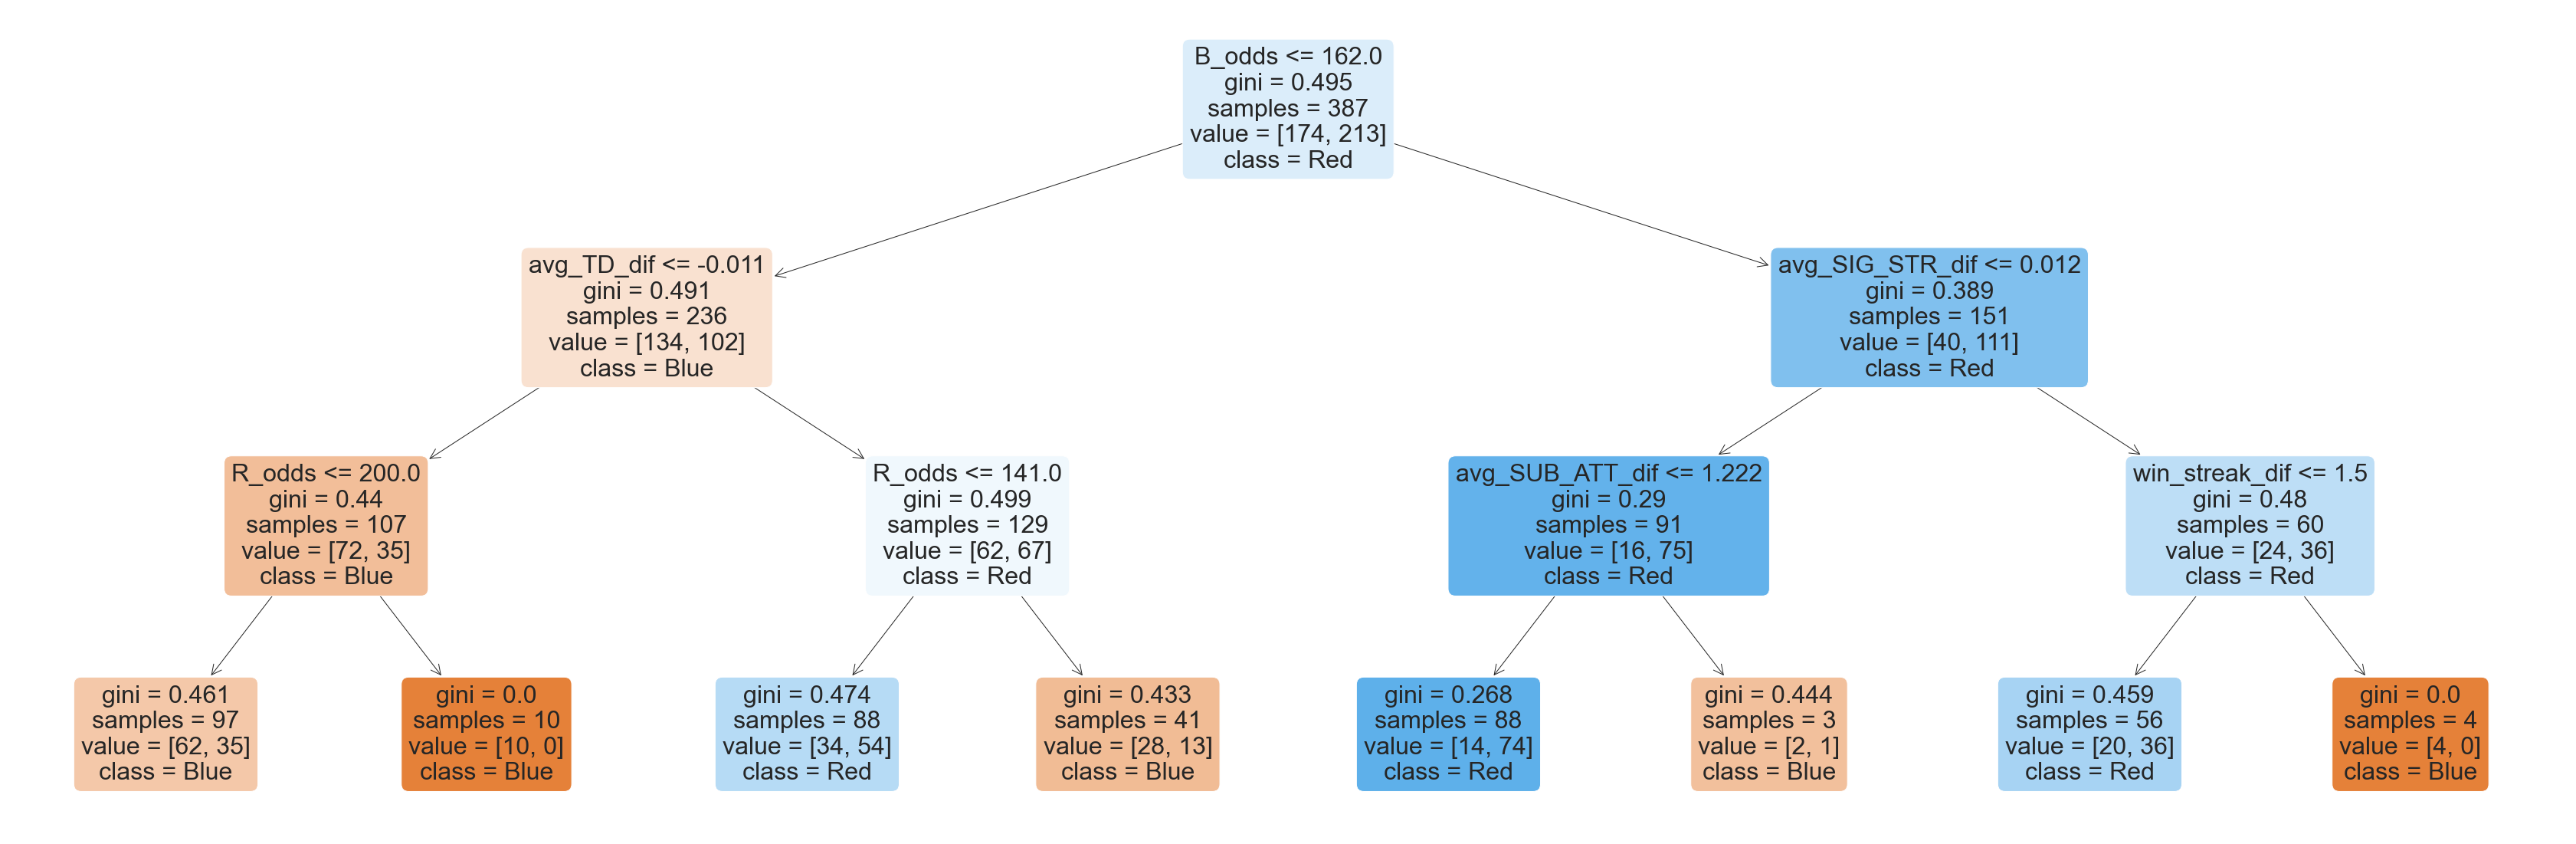

In [17]:

f = mplt.figure(figsize=(60,20))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Blue","Red"])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6976744186046512

FP Rate & FN Rate 	Train Dataset
False Positive Rate:	39.08%
False Negative Rate:	23.00%

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5968992248062015

FP Rate & FN Rate 	Test Dataset
False Positive Rate:	40.74%
False Negative Rate:	40.00%



<AxesSubplot:>

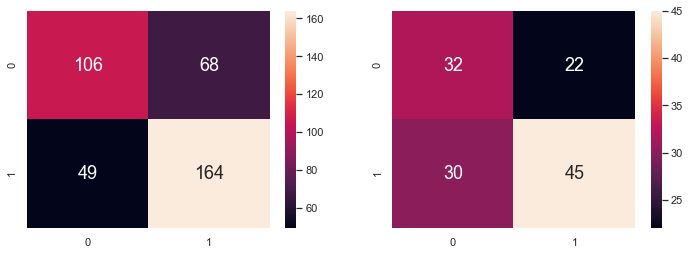

In [18]:
# Predict Legendary values corresponding to Total

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()
# Plot the Confusion Matrix for Train and Test
train = confusion_matrix(y_train,y_train_pred)
TN = train[0][0]
FN = train[1][0]
TP = train[1][1]
FP = train[0][1]
fp_rate = FP / (FP + TN)
fn_rate = FN / (FN + TP)
print("FP Rate & FN Rate \tTrain Dataset")
print(f"False Positive Rate:\t{fp_rate:.2%}") #red accuracy
print(f"False Negative Rate:\t{fn_rate:.2%}") #blue accuracy
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()
test = confusion_matrix(y_test, y_test_pred)
TN = test[0][0]
FN = test[1][0]
TP = test[1][1]
FP = test[0][1]
fp_rate = FP / (FP + TN)
fn_rate = FN / (FN + TP)
print("FP Rate & FN Rate \tTest Dataset")
print(f"False Positive Rate:\t{fp_rate:.2%}") #red accuracy
print(f"False Negative Rate:\t{fn_rate:.2%}") #blue accuracy
print()

# Plot the Confusion Matrix for Train and Test
f, axes = mplt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [19]:
list(y_test)

['Red',
 'Blue',
 'Red',
 'Blue',
 'Red',
 'Blue',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Blue',
 'Red',
 'Red',
 'Red',
 'Blue',
 'Red',
 'Red',
 'Red',
 'Blue',
 'Red',
 'Blue',
 'Blue',
 'Blue',
 'Blue',
 'Red',
 'Blue',
 'Red',
 'Red',
 'Blue',
 'Blue',
 'Blue',
 'Blue',
 'Blue',
 'Red',
 'Blue',
 'Blue',
 'Blue',
 'Red',
 'Blue',
 'Red',
 'Blue',
 'Red',
 'Red',
 'Red',
 'Red',
 'Blue',
 'Blue',
 'Blue',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Blue',
 'Red',
 'Blue',
 'Red',
 'Blue',
 'Red',
 'Blue',
 'Red',
 'Blue',
 'Red',
 'Blue',
 'Red',
 'Blue',
 'Red',
 'Blue',
 'Red',
 'Blue',
 'Blue',
 'Red',
 'Red',
 'Blue',
 'Red',
 'Red',
 'Red',
 'Red',
 'Blue',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Blue',
 'Red',
 'Blue',
 'Red',
 'Blue',
 'Red',
 'Red',
 'Red',
 'Blue',
 'Red',
 'Red',
 'Blue',
 'Blue',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Red',
 'Blue',
 'Blue',
 'Red',
 'Blue',
 'Blue',
 'Blue',
 'Blue',
 'Blue',
 'Red',
 'Blue',
 'Red',
 'Red',
 'Red',
 'Red'

In [20]:
middleweight_len = len(y_test)

In [21]:
odds_tuple_list = []
for x in range(middleweight_len):
    mytuple = (X_test.iloc[x]["R_odds"],X_test.iloc[x]["B_odds"])
    odds_tuple_list.append(mytuple)

### Getting Decimal Odds for Easier Computation

We are given money-line odds and we are converting it to decimal odds since it will be easier to calculate the profits for our betting strategy.

In [22]:
red_decimal_odds_list = []
blue_decimal_odds_list = []
for i in odds_tuple_list:
    red,blue=i
    if red>0:
        red=((red/100)+1).round(3)
    elif red<0:
        red=((100/red)+1).round(3)
    
    if blue>0:
        blue=((blue/100)+1).round(3)
    elif blue<0:
        blue=((100/blue)+1).round(3)
    red_decimal_odds_list.append(red)
    blue_decimal_odds_list.append(blue)

In [23]:
red_decimal_odds_list

[0.733,
 2.55,
 0.8,
 0.412,
 0.259,
 2.25,
 0.592,
 2.35,
 3.75,
 0.608,
 0.394,
 0.048,
 0.8,
 2.2,
 0.375,
 2.9,
 0.13,
 0.574,
 0.474,
 0.048,
 0.655,
 4.75,
 0.231,
 2.35,
 0.556,
 0.545,
 0.833,
 0.655,
 2.6,
 0.429,
 3.1,
 0.259,
 2.45,
 2.45,
 0.091,
 0.706,
 3.4,
 0.167,
 2.4,
 3.85,
 2.05,
 3.05,
 2.35,
 0.643,
 0.833,
 0.512,
 0.13,
 0.677,
 0.556,
 2.4,
 0.917,
 0.737,
 0.667,
 0.355,
 0.574,
 3.25,
 2.4,
 0.355,
 0.259,
 2.2,
 2.35,
 2.4,
 2.0,
 0.2,
 0.091,
 2.15,
 0.556,
 3.45,
 0.722,
 2.35,
 0.636,
 2.3,
 2.45,
 2.7,
 0.048,
 2.4,
 0.655,
 2.28,
 0.259,
 0.831,
 3.7,
 0.524,
 0.5,
 0.2,
 2.8,
 2.7,
 0.091,
 0.938,
 2.25,
 2.35,
 2.2,
 0.524,
 0.444,
 2.35,
 0.394,
 3.05,
 0.091,
 0.795,
 3.0,
 0.2,
 2.77,
 0.375,
 0.545,
 0.636,
 0.2,
 2.25,
 0.286,
 0.13,
 3.0,
 3.3,
 0.565,
 6.4,
 0.048,
 0.394,
 0.333,
 2.75,
 0.286,
 0.574,
 3.3,
 2.15,
 0.259,
 0.5,
 0.474,
 0.683,
 2.5,
 0.474,
 0.13,
 0.783,
 0.2]

### DataFrame of all the prediction information from Binary Classification Model
We consolidated all the prediction information which consists of the probability given to us by our model and then comparing the predicted outcome with the actual outcome.

In [24]:
y_prob = dectree.predict_proba(X_test)
y_prob = pd.DataFrame(y_prob[:,1], columns = ["Probability_Of_Red"], index = X_test.index)

Winner_df = pd.DataFrame(y_test,columns = ["Winner"],index = X_test.index)
Predicted_Winner_df = pd.DataFrame(y_test_pred,columns = ["Predicted_Winner"],index = X_test.index)
compare_prob = pd.concat([Winner_df,Predicted_Winner_df, y_prob], axis = 1)
compare_prob["Probability_Of_Blue"] = 1 - compare_prob["Probability_Of_Red"]
compare_prob["Red Decimal Odds"] = red_decimal_odds_list
compare_prob["Blue Decimal Odds"] = blue_decimal_odds_list


### Random betting strategy

To highlight the effectiveness of Kelly Criterion and our Machine Learning models in our decision making, We needed a basis for comparison, so we created a random betting stategy and illustrate the outcome.

In [25]:
import random
red = y_test.value_counts()["Red"]
blue = y_test.value_counts()["Blue"]
randomised_outcomes = []
random.seed(2)

for x in range(red):
    randomised_outcomes.append("Red")
    
for x in range(blue):
    randomised_outcomes.append("Blue")
    
random.shuffle(randomised_outcomes)

In [26]:
I =  len(y_test)


def random_simulation(capital):
    c = np.zeros((1, I+1)) #Instantiates an ndarray object to store the simulation results.
    c[0,0] = capital #Initializes the starting capital with 100.
    
    for i in range(I):
        f = random.random()
        actual_outcome = compare_prob.iloc[i]["Winner"]
        red_deci_odds = compare_prob.iloc[i]["Red Decimal Odds"]
        blue_deci_odds = compare_prob.iloc[i]["Blue Decimal Odds"]
        choice = randomised_outcomes[i]

        if (choice==actual_outcome):
            if(choice=="Red"):
                c[0,i+1] = (f) * c[0,i] * red_deci_odds + (c[0,i])
            else:
                c[0,i+1] = (f) * c[0,i] * blue_deci_odds + (c[0,i])
        else:
            c[0,i+1] = (1-f) * c[0,i]          
    return c
        

In [27]:
random_simulation(100)
print(random_simulation(100))
print("\n")
print(f'Final Outcome: ${math.floor(random_simulation(100)[0][-1])}')


[[1.00000000e+02 1.62310195e+02 5.82707244e+01 1.03007190e+02
  3.16589976e+01 3.18612737e+01 1.08596072e+01 1.58562153e+01
  4.38395368e+00 1.25701573e+01 8.07526241e+00 9.52939164e+00
  1.05188653e+01 1.27820411e+01 6.05480502e+00 7.13912874e+00
  3.23425042e-01 3.57244142e-01 5.48369371e-01 7.65669860e-01
  7.95208850e-01 6.11016722e-01 3.12358180e-01 4.82515679e-01
  2.76166000e-01 8.86105633e-02 7.21465193e-03 2.98758318e-03
  4.58801320e-03 5.73255278e-03 3.69143593e-03 5.77240036e-03
  7.59057517e-03 4.42706601e-03 4.53211137e-03 4.56764127e-03
  4.77316904e-04 5.42373828e-06 1.90871071e-06 1.66341274e-06
  1.17040628e-06 8.99223563e-07 1.23456847e-06 3.21059735e-06
  1.80164007e-06 8.57590099e-07 9.06798597e-07 4.16317358e-07
  2.08413791e-08 5.08993782e-09 4.60051759e-09 6.77946878e-09
  1.92967533e-09 2.26079366e-09 2.37616987e-10 3.00485717e-10
  4.32132429e-10 2.57480322e-10 1.25314706e-12 1.50722171e-12
  1.70687544e-12 1.45977957e-12 1.70129094e-12 1.65129866e-12
  6.6850

### Plotting A Smooth Curve
We showed the how the capital varied with the number of games.

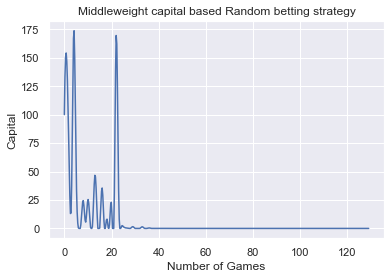

In [28]:
from scipy.interpolate import make_interp_spline
x_curve_plot = []
y_curve_plot = []


for i in range(0,middleweight_len+1):
    x_curve_plot.append(i)
    y_curve_plot.append(random_simulation(100)[0][i])
 
# Dataset
x = np.array(x_curve_plot)
y = np.array(y_curve_plot)
 
X_Y_Spline = make_interp_spline(x, y)
 
# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)
for i in range(len(Y_)):
    if(Y_[i]<=0):
        Y_[i] = 0
 
# Plotting the Graph
plt.plot(X_, Y_)
plt.title("Middleweight capital based Random betting strategy")
plt.xlabel("Number of Games")
plt.ylabel("Capital")
plt.show()

### Binary Classification Model depth 3 with Kelly Criterion

#### Kelly Criterion
The Kelly criterion is a mathematical formula relating to the long-term growth of capital developed by John L. Kelly Jr. while working at AT&T's Bell Laboratories. It is used to determine how much to invest in a given asset, in order to maximize wealth growth over time. 

#### How Kelly Criterion is calculated:

### f* = p - q/b

 where:
  <br>
 f* is the fraction of the current asset to wager.
 <br>
 p is the probability of a win.
  <br>
 q is the probabality of a loss (q=1-p).
  <br>
 b is the proportion of the bet gained with a win.
  <br>

After attaining our binary classification model, we used Kelly Criterion as a guideline on how much to bet based on the probability given by us from the model.

In [29]:
predictions_binary = list(compare_prob["Predicted_Winner"])
probability_binary = []

for x in range(len(y_test)):
    to_append = [compare_prob.iloc[x]["Probability_Of_Blue"],compare_prob.iloc[x]["Probability_Of_Red"]]
    probability_binary.append(to_append)

In [30]:
I =  len(y_test)

def run_simulation_pure_kelly_criterion_binary(capital):
    c = np.zeros((1, I+1)) #Instantiates an ndarray object to store the simulation results.
    c[0,0] = capital #Initializes the starting capital with 100.
    flag = 0
    for i in range(I): #Outer loop for the series simulations.
        red_proba = compare_prob.iloc[i]["Probability_Of_Red"]
        blue_proba = compare_prob.iloc[i]["Probability_Of_Blue"]
        red_deci_odds = compare_prob.iloc[i]["Red Decimal Odds"]
        blue_deci_odds = compare_prob.iloc[i]["Blue Decimal Odds"]
        prediction = compare_prob.iloc[i]["Predicted_Winner"]
        actual_outcome = compare_prob.iloc[i]["Winner"]

        if flag==1 : 
            c[0,i+1] = 0
            continue
            
        elif c[0,i]<=0:
            c[0,i+1] = 0
            flag = 1
            continue
        
        if prediction=='Red':
            f = (red_proba) - (blue_proba)/red_deci_odds 
            if(f<0):
                f = 0
            elif(f>1):
                f = 1
                
            if prediction==actual_outcome:
                c[0,i+1] = (f) * c[0,i] * red_deci_odds  + (c[0,i])
            else:
                c[0,i+1] = (1-f) * c[0,i]
        else:
            f = (blue_proba) - (red_proba)/blue_deci_odds
            if(f<0):
                f = 0
            elif(f>1):
                f = 1
                
            if prediction==actual_outcome:
                c[0,i+1] = (f) * c[0,i] * blue_deci_odds + (c[0,i])
            else:
                c[0,i+1] = (1-f) * c[0,i]
            
        
    return c




c_1 = run_simulation_pure_kelly_criterion_binary(100) #Runs the simulation.
print(c_1)#Looking at a simulation
print("\n")
print(f'Final Outcome: ${math.floor(c_1[0][-1])}')

[[100.         145.72954545 145.72954545 168.6299026  168.6299026
   89.14623237  89.14623237 119.34249254 119.34249254  90.2506938
   93.29343148  47.40240627  47.40240627  54.85135583 107.70811691
  107.70811691 112.10050646 112.10050646 113.42969817 140.59611089
  140.59611089 149.5842194  179.99724509 356.65433511 196.43582577
   87.45826579 113.62617645  39.77784214  55.35900371  55.35900371
   55.35900371  86.63684081  86.63684081  86.63684081  86.63684081
   86.63684081  74.76854028  83.89394944  83.89394944  83.89394944
   96.42484081  96.42484081 150.0370523  150.0370523  207.29323742
  319.51896944 319.51896944 319.51896944 282.67214167 125.85288453
  125.85288453 202.87771015 226.54194591 317.56547004 164.40525231
  217.60529736 353.17339762 353.17339762 353.17339762 353.17339762
  353.17339762 726.01213215 397.38164051 397.38164051 397.38164051
  397.38164051 397.38164051 175.89023433 291.09833781 421.52362489
  232.16412415 319.39451735 177.05565635 177.05565635 168.418795

### Plotting A Smooth Curve
We showed the how the capital varied with the number of games.

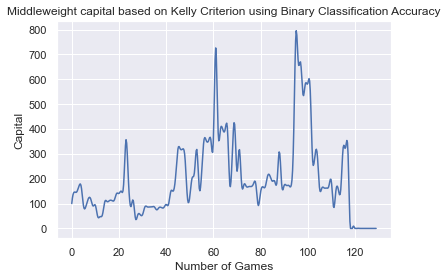

In [31]:
from scipy.interpolate import make_interp_spline
x_curve_plot = []
y_curve_plot = []



for i in range(0,middleweight_len + 1):
    x_curve_plot.append(i)
    y_curve_plot.append(run_simulation_pure_kelly_criterion_binary(100)[0][i])
 
# Dataset
x = np.array(x_curve_plot)
y = np.array(y_curve_plot)
 
X_Y_Spline = make_interp_spline(x, y)
 
# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)
for i in range(len(Y_)):
    if(Y_[i]<=0):
        Y_[i] = 0
 
# Plotting the Graph
plt.plot(X_, Y_)
plt.title("Middleweight capital based on Kelly Criterion using Binary Classification Accuracy")
plt.xlabel("Number of Games")
plt.ylabel("Capital")
plt.show()

### Decision Tree depth 5 with Kelly Criterion

In [32]:
# Decision Tree using Train Data
dectree5 = DecisionTreeClassifier(max_depth = 5)  # create the decision tree object
dectree5.fit(X_train, y_train)                    # train the decision tree model

DecisionTreeClassifier(max_depth=5)

[Text(1906.5, 996.6, 'B_odds <= 162.0\ngini = 0.495\nsamples = 387\nvalue = [174, 213]\nclass = Red'),
 Text(976.5, 815.4000000000001, 'avg_TD_dif <= -0.011\ngini = 0.491\nsamples = 236\nvalue = [134, 102]\nclass = Blue'),
 Text(465.0, 634.2, 'R_odds <= 200.0\ngini = 0.44\nsamples = 107\nvalue = [72, 35]\nclass = Blue'),
 Text(372.0, 453.0, 'B_odds <= 121.5\ngini = 0.461\nsamples = 97\nvalue = [62, 35]\nclass = Blue'),
 Text(186.0, 271.79999999999995, 'R_odds <= 181.0\ngini = 0.493\nsamples = 68\nvalue = [38, 30]\nclass = Blue'),
 Text(93.0, 90.59999999999991, 'gini = 0.486\nsamples = 65\nvalue = [38, 27]\nclass = Blue'),
 Text(279.0, 90.59999999999991, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Red'),
 Text(558.0, 271.79999999999995, 'lose_streak_dif <= 1.5\ngini = 0.285\nsamples = 29\nvalue = [24, 5]\nclass = Blue'),
 Text(465.0, 90.59999999999991, 'gini = 0.198\nsamples = 27\nvalue = [24, 3]\nclass = Blue'),
 Text(651.0, 90.59999999999991, 'gini = 0.0\nsamples = 2\nvalue = [0

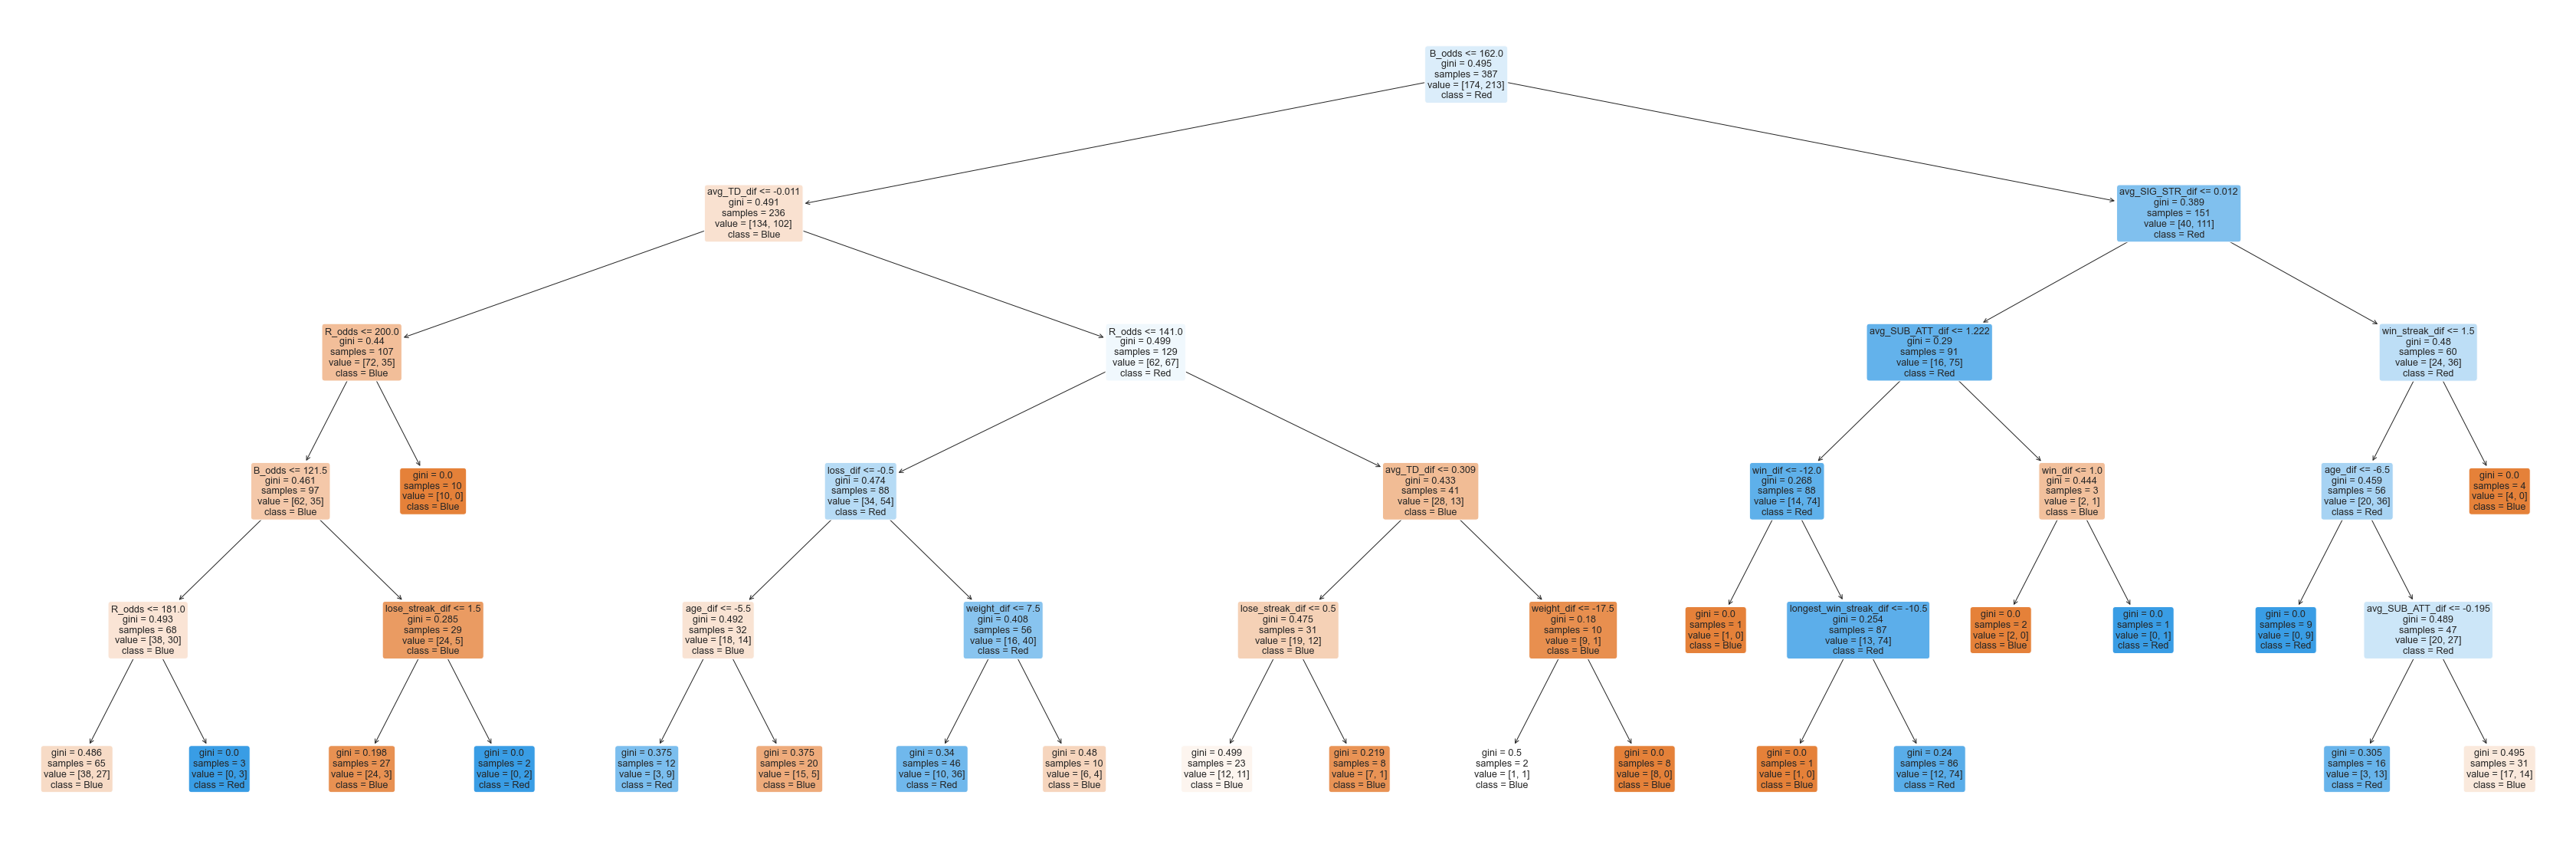

In [33]:
f = mplt.figure(figsize=(60,20))
plot_tree(dectree5, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Blue","Red"])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7571059431524548

FP Rate & FN Rate 	Train Dataset
False Positive Rate:	16.09%
False Negative Rate:	30.99%

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5503875968992248

FP Rate & FN Rate 	Test Dataset
False Positive Rate:	33.33%
False Negative Rate:	53.33%



<AxesSubplot:>

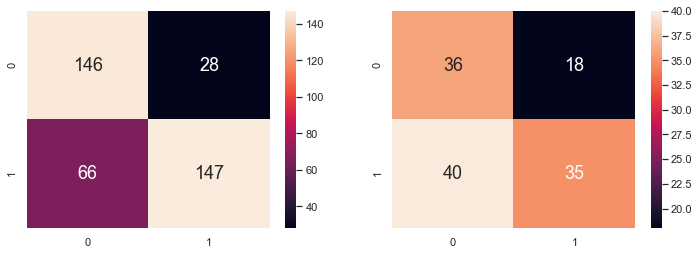

In [34]:
# Predict Legendary values corresponding to Total

y_train_pred = dectree5.predict(X_train)
y_test_pred = dectree5.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree5.score(X_train, y_train))
print()
# Plot the Confusion Matrix for Train and Test
train = confusion_matrix(y_train,y_train_pred)
TN = train[0][0]
FN = train[1][0]
TP = train[1][1]
FP = train[0][1]
fp_rate = FP / (FP + TN)
fn_rate = FN / (FN + TP)
print("FP Rate & FN Rate \tTrain Dataset")
print(f"False Positive Rate:\t{fp_rate:.2%}") #red accuracy
print(f"False Negative Rate:\t{fn_rate:.2%}") #blue accuracy
print()
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree5.score(X_test, y_test))
print()
test = confusion_matrix(y_test, y_test_pred)
TN = test[0][0]
FN = test[1][0]
TP = test[1][1]
FP = test[0][1]
fp_rate = FP / (FP + TN)
fn_rate = FN / (FN + TP)
print("FP Rate & FN Rate \tTest Dataset")
print(f"False Positive Rate:\t{fp_rate:.2%}") #red accuracy
print(f"False Negative Rate:\t{fn_rate:.2%}") #blue accuracy
print()

# Plot the Confusion Matrix for Train and Test
f, axes = mplt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [35]:
y_prob = dectree5.predict_proba(X_test)
y_prob = pd.DataFrame(y_prob[:,1], columns = ["Probability_Of_Red"], index = X_test.index)

Winner_df = pd.DataFrame(y_test,columns = ["Winner"],index = X_test.index)
Predicted_Winner_df = pd.DataFrame(y_test_pred,columns = ["Predicted_Winner"],index = X_test.index)
compare_prob = pd.concat([Winner_df,Predicted_Winner_df, y_prob], axis = 1)
compare_prob["Probability_Of_Blue"] = 1 - compare_prob["Probability_Of_Red"]
compare_prob["Red Decimal Odds"] = red_decimal_odds_list
compare_prob["Blue Decimal Odds"] = blue_decimal_odds_list

In [36]:
predictions_binary = list(compare_prob["Predicted_Winner"])
probability_binary = []

for x in range(len(y_test)):
    to_append = [compare_prob.iloc[x]["Probability_Of_Blue"],compare_prob.iloc[x]["Probability_Of_Red"]]
    probability_binary.append(to_append)

In [37]:
I =  len(y_test)

def run_simulation_pure_kelly_criterion_binary(capital):
    c = np.zeros((1, I+1)) #Instantiates an ndarray object to store the simulation results.
    c[0,0] = capital #Initializes the starting capital with 100.
    flag = 0
    for i in range(I): #Outer loop for the series simulations.
        red_proba = compare_prob.iloc[i]["Probability_Of_Red"]
        blue_proba = compare_prob.iloc[i]["Probability_Of_Blue"]
        red_deci_odds = compare_prob.iloc[i]["Red Decimal Odds"]
        blue_deci_odds = compare_prob.iloc[i]["Blue Decimal Odds"]
        prediction = compare_prob.iloc[i]["Predicted_Winner"]
        actual_outcome = compare_prob.iloc[i]["Winner"]

        if flag==1 : 
            c[0,i+1] = 0
            continue
            
        elif c[0,i]<=0:
            c[0,i+1] = 0
            flag = 1
            continue
        
        if prediction=='Red':
            f = (red_proba) - (blue_proba)/red_deci_odds 
            if(f<0):
                f = 0
            elif(f>1):
                f = 1
                
            if prediction==actual_outcome:
                c[0,i+1] = (f) * c[0,i] * red_deci_odds  + (c[0,i])
            else:
                c[0,i+1] = (1-f) * c[0,i]
        else:
            f = (blue_proba) - (red_proba)/blue_deci_odds
            if(f<0):
                f = 0
            elif(f>1):
                f = 1
                
            if prediction==actual_outcome:
                c[0,i+1] = (f) * c[0,i] * blue_deci_odds + (c[0,i])
            else:
                c[0,i+1] = (1-f) * c[0,i]
            
        
    return c




c_1 = run_simulation_pure_kelly_criterion_binary(100) #Runs the simulation.
print(c_1)#Looking at a simulation
print("\n")
print(f'Final Outcome: ${math.floor(c_1[0][-1])}')

[[100.         149.11860465 149.11860465 218.0859593  572.47564317
  348.40109804 348.40109804 477.26089021 477.26089021 477.26089021
  279.87663181  43.7902213   43.7902213   78.82239835 197.39870195
  212.4181684  323.72528864 323.72528864 195.75733693 248.28403817
  248.28403817 410.91008317 410.91008317 744.69550458 230.77982797
   90.11880851 119.80562067  36.78556677  52.38521351  52.38521351
   37.93375398  59.36632498  59.36632498  59.36632498  59.36632498
   59.36632498  26.89773825  44.19298394  44.19298394  44.19298394
   44.19298394  44.19298394  68.76428302  68.76428302   0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.      

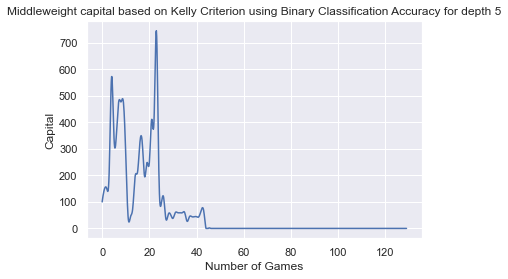

In [38]:
from scipy.interpolate import make_interp_spline
x_curve_plot = []
y_curve_plot = []



for i in range(0,middleweight_len + 1):
    x_curve_plot.append(i)
    check = run_simulation_pure_kelly_criterion_binary(100)[0][i]
    if check <=0:
        check = 0
    y_curve_plot.append(check)
 
# Dataset
x = np.array(x_curve_plot)
y = np.array(y_curve_plot)
 
X_Y_Spline = make_interp_spline(x, y)
 
# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 1000)
Y_ = X_Y_Spline(X_)
for i in range(len(Y_)):
    if(Y_[i]<=0):
        Y_[i] = 0
        
 
# Plotting the Graph
plt.plot(X_, Y_)
plt.title("Middleweight capital based on Kelly Criterion using Binary Classification Accuracy for depth 5")
plt.xlabel("Number of Games")
plt.ylabel("Capital")
plt.show()

### Alternative Machine Learning Model - Logistic Regression 

We then calculated the classification accuracy, true postive rate and false positive rate for our decision tree model. We only need false positive rate for our case since we would not be betting for negatives. We have decided to compare Binary Classification with Logistic Regression to see if there is a more reliable model for our betting strategy. (i.e higher classification accuracy).

Accuracy =  0.6356589147286822
              precision    recall  f1-score   support

        Blue       0.56      0.63      0.59        54
         Red       0.71      0.64      0.67        75

    accuracy                           0.64       129
   macro avg       0.63      0.63      0.63       129
weighted avg       0.64      0.64      0.64       129

FP Rate & FN Rate 	Test Dataset
False Positive Rate:	37.04%
False Negative Rate:	36.00%



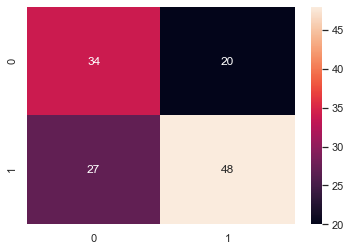

In [39]:
logmodel = LogisticRegression(max_iter = 3000)
lm = logmodel.fit(X_train,y_train)
predictions = lm.predict(X_test)
print("Accuracy = ",lm.score(X_test,y_test))
print(classification_report(y_test,predictions))
test = confusion_matrix(y_test,predictions)
TN = test[0][0]
FN = test[1][0]
TP = test[1][1]
FP = test[0][1]
fp_rate = FP / (FP + TN)
fn_rate = FN / (FN + TP)
print("FP Rate & FN Rate \tTest Dataset")
print(f"False Positive Rate:\t{fp_rate:.2%}") #red accuracy
print(f"False Negative Rate:\t{fn_rate:.2%}") #blue accuracy
print()
hm = sb.heatmap(data = test,annot = True)
  
# displaying the plotted heatmap
plt.show()

In [40]:
probability = lm.predict_proba(X_test).round(3)
probability

array([[0.333, 0.667],
       [0.624, 0.376],
       [0.28 , 0.72 ],
       [0.383, 0.617],
       [0.152, 0.848],
       [0.594, 0.406],
       [0.345, 0.655],
       [0.648, 0.352],
       [0.762, 0.238],
       [0.39 , 0.61 ],
       [0.425, 0.575],
       [0.463, 0.537],
       [0.307, 0.693],
       [0.422, 0.578],
       [0.506, 0.494],
       [0.637, 0.363],
       [0.677, 0.323],
       [0.49 , 0.51 ],
       [0.407, 0.593],
       [0.512, 0.488],
       [0.302, 0.698],
       [0.708, 0.292],
       [0.423, 0.577],
       [0.484, 0.516],
       [0.472, 0.528],
       [0.359, 0.641],
       [0.208, 0.792],
       [0.446, 0.554],
       [0.765, 0.235],
       [0.293, 0.707],
       [0.597, 0.403],
       [0.52 , 0.48 ],
       [0.621, 0.379],
       [0.637, 0.363],
       [0.587, 0.413],
       [0.469, 0.531],
       [0.616, 0.384],
       [0.456, 0.544],
       [0.621, 0.379],
       [0.609, 0.391],
       [0.737, 0.263],
       [0.663, 0.337],
       [0.476, 0.524],
       [0.2

### DataFrame of all the prediction information from logistic regression model
We consolidated all the prediction information which consists of the probability given to us by our model and then comparing the predicted outcome with the actual outcome.

In [41]:
y_prob_logistic = lm.predict_proba(X_test).round(3)
y_prob_logistic = pd.DataFrame(y_prob_logistic[:,1], columns = ["Probability_Of_Red"], index = X_test.index)
Winner_df_logistic = pd.DataFrame(y_test,columns = ["Winner"],index = X_test.index)
Predicted_Winner_logistic_df = pd.DataFrame(predictions,columns = ["Predicted_Winner"],index = X_test.index)
compare_prob_logistic = pd.concat([Winner_df,Predicted_Winner_logistic_df, y_prob_logistic], axis = 1)
compare_prob_logistic["Probability_Of_Blue"] = 1 - compare_prob_logistic["Probability_Of_Red"]
compare_prob_logistic["Red Decimal Odds"] = red_decimal_odds_list
compare_prob_logistic["Blue Decimal Odds"] = blue_decimal_odds_list
compare_prob_logistic


,Winner,Predicted_Winner,Probability_Of_Red,Probability_Of_Blue,Red Decimal Odds,Blue Decimal Odds
693,Red,Red,0.667,0.333,0.733,3.770
2180,Blue,Blue,0.376,0.624,2.550,0.429
4627,Red,Red,0.720,0.280,0.800,5.350
1361,Blue,Red,0.617,0.383,0.412,2.500
630,Red,Red,0.848,0.152,0.259,2.150
...,...,...,...,...,...,...
2093,Blue,Blue,0.452,0.548,2.500,0.412
3953,Blue,Blue,0.495,0.505,0.474,2.650
2757,Red,Blue,0.411,0.589,0.130,0.048
5023,Red,Red,0.814,0.186,0.783,5.100


### Logistic Regression Model with Kelly Criterion
After attaining our logistic regression model, we used Kelly Criterion as a guideline on how much to bet based on the probability given by us from the model.

In [42]:
I =  len(y_test)

def run_simulation_pure_kelly_criterion_logistic(capital):
    c = np.zeros((1, I+1)) #Instantiates an ndarray object to store the simulation results.
    c[0,0] = capital #Initializes the starting capital with 100.
    flag = 0
    for i in range(I): #Outer loop for the series simulations.
        red_proba = compare_prob_logistic.iloc[i]["Probability_Of_Red"]
        blue_proba = compare_prob_logistic.iloc[i]["Probability_Of_Blue"]
        red_deci_odds = compare_prob_logistic.iloc[i]["Red Decimal Odds"]
        blue_deci_odds = compare_prob_logistic.iloc[i]["Blue Decimal Odds"]
        prediction = compare_prob_logistic.iloc[i]["Predicted_Winner"]
        actual_outcome = compare_prob_logistic.iloc[i]["Winner"]
        
        if flag==1 : 
            c[0,i+1] = 0
            continue
            
        elif c[0,i]<=0:
            c[0,i+1] = 0
            flag = 1
            continue
        
        if prediction=='Red':
            f = (red_proba) - (blue_proba)/red_deci_odds 
            if(f<0):
                f = 0
            elif(f>1):
                f = 1
                
            if prediction==actual_outcome:
                c[0,i+1] = (f) * c[0,i] * red_deci_odds + (c[0,i])
            else:
                c[0,i+1] = (1-f) * c[0,i]
        else:
            f = blue_proba - red_proba/blue_deci_odds
            if(f<0):
                f = 0
            elif(f>1):
                f = 1
                
            if prediction==actual_outcome:
                c[0,i+1] = (f) * c[0,i] * blue_deci_odds + (c[0,i])
            else:
                c[0,i+1] = (1-f) * c[0,i]
            
        
    return c


c_1 = run_simulation_pure_kelly_criterion_logistic(100) #Runs the simulation.
print(c_1)#Looking at a simulation
print("\n")
print(f'Final Outcome: ${math.floor(c_1[0][-1])}')

[[ 100.          115.5911      115.5911      149.8060656   149.8060656
   159.93774943  159.93774943  166.77668759  166.77668759   94.66910047
    94.66910047   94.66910047   94.66910047  118.09023592  218.41970036
   152.85738697  152.85738697  152.85738697  152.85738697  152.85738697
   152.85738697  176.57932485  220.28200144  220.28200144  151.98520729
   151.98520729  151.98520729   69.56361113   69.56361113   51.96280508
    50.71484988   50.71484988   83.0709241    83.0709241    83.0709241
    83.0709241    83.0709241    84.07508543   84.07508543   84.07508543
    86.17250659   86.17250659   88.89797062  156.05149763  200.75541411
   331.55419133  152.51250791  152.51250791  126.55947471  126.55947471
   126.55947471  218.59567623  226.30161101  267.46655296  155.42132523
   164.88275383  164.88275383  125.14601015  125.14601015   87.82630578
    87.82630578   87.82630578   87.82630578   87.82630578   87.82630578
    87.82630578   87.82630578   88.69086793  102.7483705   103.505

### Plotting A Smooth Curve
We showed the how the capital varied with the number of games.

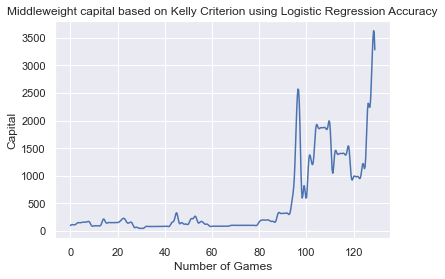

In [43]:
from scipy.interpolate import make_interp_spline
x_curve_plot = []
y_curve_plot = []



for i in range(0,middleweight_len + 1):
    x_curve_plot.append(i)
    y_curve_plot.append(run_simulation_pure_kelly_criterion_logistic(100)[0][i])
 
# Dataset
x = np.array(x_curve_plot)
y = np.array(y_curve_plot)
 
X_Y_Spline = make_interp_spline(x, y)
 
# Returns evenly spaced numbers
# over a specified interval
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)
for i in range(len(Y_)):
    if(Y_[i]<=0):
        Y_[i] = 0
 
# Plotting the Graph
plt.plot(X_, Y_)
plt.title("Middleweight capital based on Kelly Criterion using Logistic Regression Accuracy")
plt.xlabel("Number of Games")
plt.ylabel("Capital")
plt.show()

In [44]:
def findmaxindex(ylist):
    for i in ylist:
        if i==max(ylist):
            return  list(ylist).index(i)

In [45]:
findmaxindex(y)

128

### Preferred Choice of Model with Kelly Criterion and Take Profit/Stop Loss

Based on the end result of both model, we have decided to go ahead with the logistic regression model as our preferred model as it yields a higher return on the test dataset based on Kelly Criterion. We provided of take profit/stop loss as this option is a crucial part of investment/gambling.

In [46]:
def takeprofit(capital):
    while True:
        try:
            profit = int(input("Please enter take profit as a percentage of your capital(>= 0): "))
            if profit>=0:
                break
        except:
            print("Please enter an integer")
    return (profit/100 + 1)*capital

def stoploss(capital):
    while True:  
        try:
            Stoploss = int(input("Please enter stop loss as a percentage of your capital(<= 100%): "))
            if(Stoploss>=0):
                if(Stoploss/100 *capital) <= capital:
                    break
                else:
                    Stoploss = int(input("Please enter stop loss as a percentage of your capital(<= 100%): "))
            else:
                Stoploss = int(input("Please enter stop loss as a percentage of your capital(>=0%): "))
        except:
            print("Please enter an integer!")
    return (Stoploss/100 *capital)

In [47]:
I =  len(y_test)

def run_simulation_pure_kelly_criterion_logistic_modified(capital):
    c = np.zeros((1, I+1)) #Instantiates an ndarray object to store the simulation results.
    c[0,0] = capital #Initializes the starting capital with 100.
    flag = 0
    profit = takeprofit(capital)
    stop_loss = stoploss(capital)
    
    for i in range(I): #Outer loop for the series simulations.
        red_proba = compare_prob_logistic.iloc[i]["Probability_Of_Red"]
        blue_proba = compare_prob_logistic.iloc[i]["Probability_Of_Blue"]
        red_deci_odds = compare_prob_logistic.iloc[i]["Red Decimal Odds"]
        blue_deci_odds = compare_prob_logistic.iloc[i]["Blue Decimal Odds"]
        prediction = compare_prob_logistic.iloc[i]["Predicted_Winner"]
        actual_outcome = compare_prob_logistic.iloc[i]["Winner"]
        if(c[0][i] >= profit):
            c[0][i+1] = c[0][i]
            continue
            
        if(c[0][i]<= stop_loss):
            c[0][i+1] = c[0][i]
            continue
            
        if flag==1 : 
            c[0,i+1] = 0
            continue
            
        elif c[0,i]<=0:
            c[0,i+1] = 0
            flag = 1
            continue
        
        if prediction=='Red':
            f = (red_proba) - (blue_proba)/red_deci_odds 
                
            if(f<0):
                f = 0
            elif(f>1):
                f = 1
            
            
            if prediction==actual_outcome:
                c[0,i+1] = (f) * c[0,i] * red_deci_odds + (c[0,i])
            else:
                c[0,i+1] = (1-f) * c[0,i]
        else:
            f = blue_proba - red_proba/blue_deci_odds

            if(f<0):
                f = 0
            elif(f>1):
                f = 1
                
            if prediction==actual_outcome:
                c[0,i+1] = (f) * c[0,i] * blue_deci_odds + (c[0,i])
            else:
                c[0,i+1] = (1-f) * c[0,i]
            

    return c


c_1 = run_simulation_pure_kelly_criterion_logistic_modified(100) #Runs the simulation.
print(c_1)#Looking at a simulation
print("\n")
print(f'Final Outcome: ${math.floor(c_1[0][-1])}')

Please enter take profit as a percentage of your capital(>= 0): 1000
Please enter stop loss as a percentage of your capital(<= 100%): 10
[[ 100.          115.5911      115.5911      149.8060656   149.8060656
   159.93774943  159.93774943  166.77668759  166.77668759   94.66910047
    94.66910047   94.66910047   94.66910047  118.09023592  218.41970036
   152.85738697  152.85738697  152.85738697  152.85738697  152.85738697
   152.85738697  176.57932485  220.28200144  220.28200144  151.98520729
   151.98520729  151.98520729   69.56361113   69.56361113   51.96280508
    50.71484988   50.71484988   83.0709241    83.0709241    83.0709241
    83.0709241    83.0709241    84.07508543   84.07508543   84.07508543
    86.17250659   86.17250659   88.89797062  156.05149763  200.75541411
   331.55419133  152.51250791  152.51250791  126.55947471  126.55947471
   126.55947471  218.59567623  226.30161101  267.46655296  155.42132523
   164.88275383  164.88275383  125.14601015  125.14601015   87.82630578
 

###  Key Takeaways

As seen from the graph of the capital without any stop loss/take profit option, we can see that the end outcome may not be the most profitable so the introduction of take profit/stop loss gives the user more flexibility on when to stop betting.



**Conclusion:**
Based on our analysis, logistic regression has a better accuracy score and yields higher profits than binary classification when used in Kelly Criterion Model.Kelly Criterion Model will increase our profits at the end if our machine learning model has a decently high accuracy. 

<br>

We would recommend a typical player to use our Kelly criterion formula as a guideline on the proportion of money to put in each games rather than random betting as seen from the difference in the amount of money left at the end.

<br>


For players with specific risk tolerance, they can use our modified model to achieve their goals. I.e High risk tolerance players can set a higher take profit and lower stop loss in hopes of winning more money, while low risk tolerance players can set a relatively lower take profit and a higher stop loss to minimise their losses. 

<br>


**Ultimately, the outcome depends on the risk aversion of the players.**
